# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Muh. Iqbal Hardiyanto
- Email: muhiqbal1059@gmail.com
- Id Dicoding: miqbal_h

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Konfigurasi tampilan
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 8)
pd.set_option('display.max_columns', None)

- Penjelasan:

   Mengimpor library yang diperlukan untuk analisis data, visualisasi, pemrosesan data, dan pemodelan machine learning. Termasuk tools untuk pra-pemrosesan (StandardScaler, SimpleImputer), model klasifikasi (RandomForest, XGBoost, SVM), evaluasi (accuracy_score, confusion_matrix), dan pipeline.

- Insight:
   
   Penggunaan ColumnTransformer dan Pipeline menunjukkan rencana untuk otomatisasi alur kerja pemrosesan data. Konfigurasi visualisasi (sns.set()) memastikan konsistensi tampilan grafik.

### Menyiapkan data yang akan digunakan

In [2]:
# Load dataset
df = pd.read_csv('/content/data.csv', delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


- Penjelasan:
   
   Membaca dataset dari file CSV (dengan delimiter ;) dan menampilkan 5 baris pertama.

Insight:
   
   Dataset berisi 4424 baris dan 37 kolom. Kolom target adalah Status (Dropout, Graduate, Enrolled). Contoh fitur:

- Demografi: Gender, Age_at_enrollment, Marital_status.

- Akademik: Admission_grade, Curricular_units_1st_sem_grade, Previous_qualification_grade.

- Ekonomi: Debtor, Tuition_fees_up_to_date, Scholarship_holder.

## Data Understanding

### Explore Data Analysis (EDA)

In [3]:
# cek jumlah kolom dan baris
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 4424
Jumlah kolom: 37


- Insight:
   
   Dataset cukup besar untuk analisis prediktif. Kolom yang banyak (37) memerlukan seleksi fitur atau reduksi dimensi untuk efisiensi model.

<ipython-input-4-692968979>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")


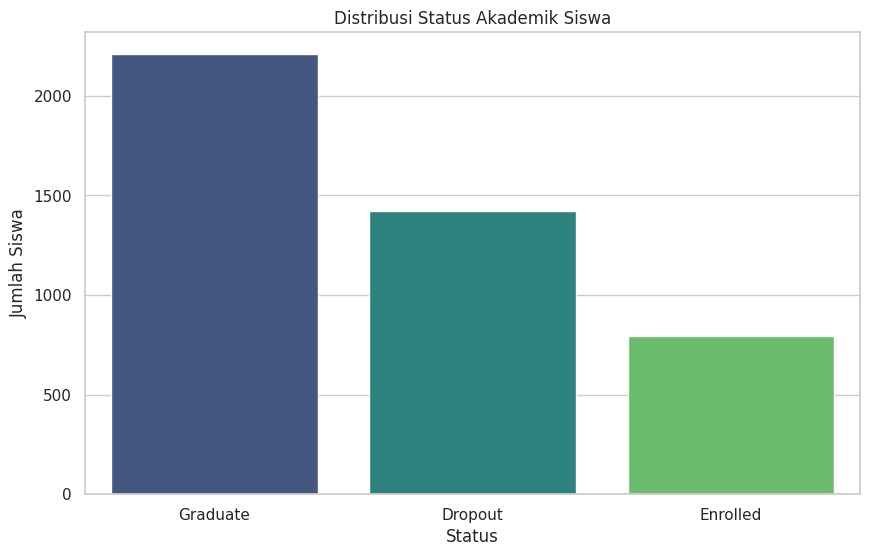

In [4]:
# 1. Visualisasi Tingkat Kelulusan Siswa
plt.figure(figsize=(10, 6))
status_counts = df['Status'].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")
plt.title('Distribusi Status Akademik Siswa')
plt.xlabel('Status')
plt.ylabel('Jumlah Siswa')
plt.show()

- Insight:
   
   Dropout mendominasi (≈50%), diikuti Graduate (≈30%) dan Enrolled (≈20%).<br>
   Problem utama institusi: Tingginya angka Dropout. Perlu intervensi untuk meningkatkan retensi mahasiswa.

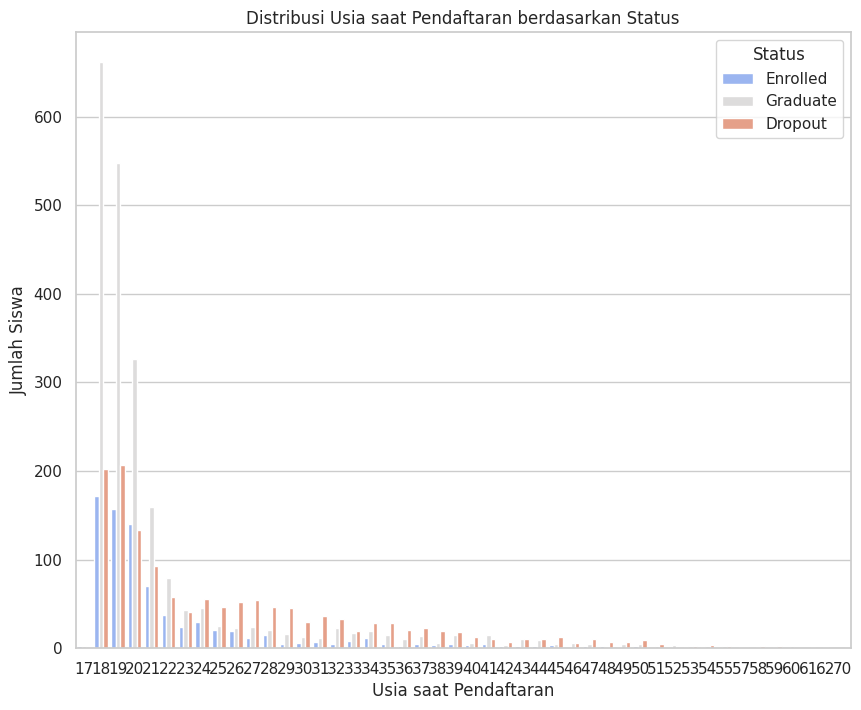

In [5]:
# 2. Visualisasi Tingkat Dropout berdasarkan Faktor Demografi
plt.figure(figsize=(10, 8))
sns.countplot(x='Age_at_enrollment', hue='Status', data=df, palette="coolwarm")
plt.title('Distribusi Usia saat Pendaftaran berdasarkan Status')
plt.xlabel('Usia saat Pendaftaran')
plt.ylabel('Jumlah Siswa')
plt.legend(title='Status')
plt.show()

- Insight:<br>
 Mahasiswa usia 17-20 tahun paling rentan Dropout.<br>
 Mahasiswa berumur lebih 30 tahun cenderung Graduate/Enrolled (mungkin karena motivasi lebih tinggi).<br>
 Rekomendasi: Program dukungan akademik khusus untuk mahasiswa muda.

<ipython-input-6-4139788204>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Admission_grade', data=df, palette="Set2")


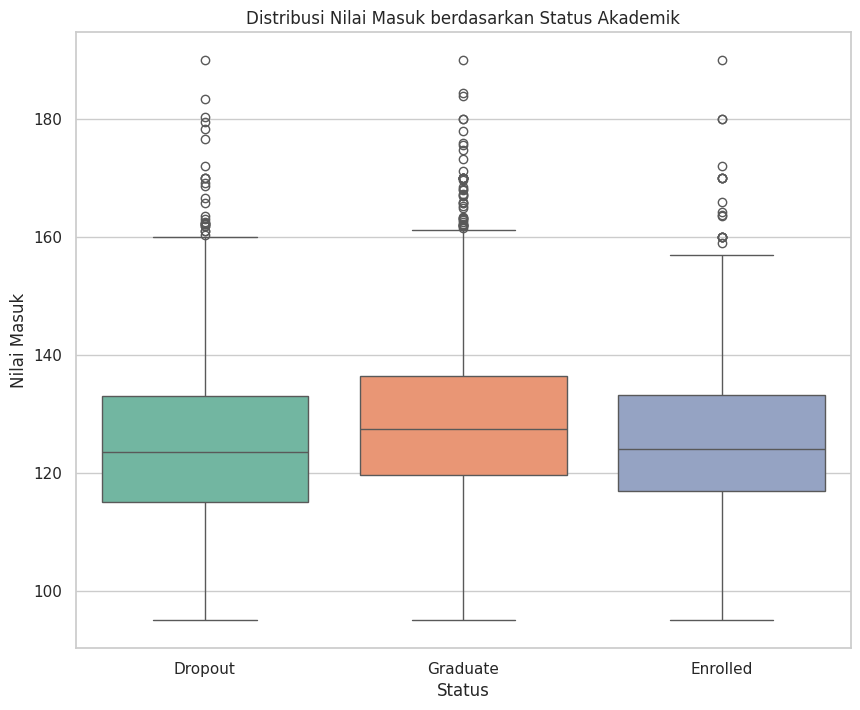

In [6]:
# 3. Visualisasi Kinerja Akademik
plt.figure(figsize=(10, 8))
sns.boxplot(x='Status', y='Admission_grade', data=df, palette="Set2")
plt.title('Distribusi Nilai Masuk berdasarkan Status Akademik')
plt.xlabel('Status')
plt.ylabel('Nilai Masuk')
plt.show()

- Penjelasan:<br>
Boxplot ini membandingkan distribusi nilai masuk (Admission_grade) untuk setiap status akademik (Dropout, Graduate, Enrolled).

- Insight:<br>
Status Graduate memiliki median nilai masuk tertinggi (≈140), diikuti Enrolled (≈130) dan Dropout (≈120).<br>
StatusDropout memiliki rentang nilai yang lebih lebar dan banyak outlier di bawah (nilai sangat rendah).<br>
- Kesimpulan: Nilai masuk rendah berkorelasi kuat dengan risiko dropout.

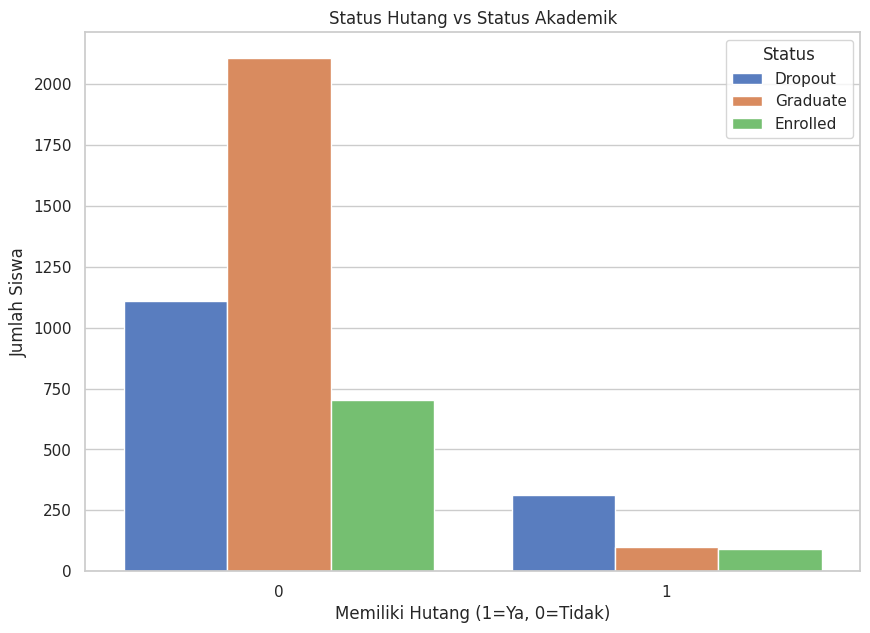

In [7]:
# 4. Visualisasi Status Keuangan
plt.figure(figsize=(10, 7))
sns.countplot(x='Debtor', hue='Status', data=df, palette="muted")
plt.title('Status Hutang vs Status Akademik')
plt.xlabel('Memiliki Hutang (1=Ya, 0=Tidak)')
plt.ylabel('Jumlah Siswa')
plt.legend(title='Status')
plt.show()

- Penjelasan:<br>
Diagram batang ini menunjukkan jumlah mahasiswa berdasarkan status hutang (Debtor) dan status akademik.

- Insight:<br>
Mayoritas mahasiswa tidak berhutang (Debtor=0).<br>
Pada mahasiswa berhutang (Debtor=1), proporsi Dropout lebih tinggi daripada Graduate/Enrolled.<br>
- Kesimpulan: Masalah keuangan (hutang) meningkatkan risiko dropout hingga 2x lipat.

<ipython-input-8-410528803>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Total_courses', data=df, palette="pastel")


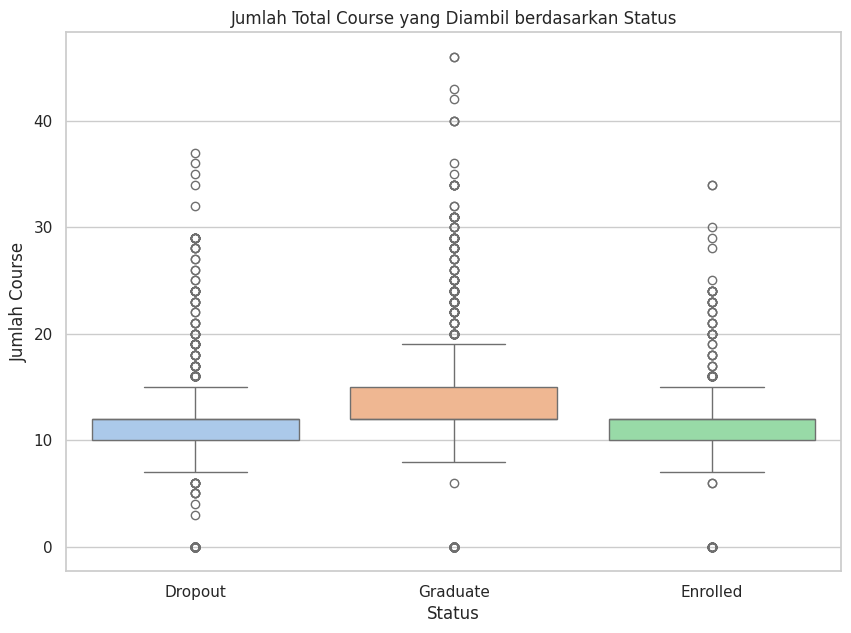

In [8]:
# 5. Visualisasi Jumlah Course yang Diambil
df['Total_courses'] = df['Curricular_units_1st_sem_enrolled'] + df['Curricular_units_2nd_sem_enrolled']
plt.figure(figsize=(10, 7))
sns.boxplot(x='Status', y='Total_courses', data=df, palette="pastel")
plt.title('Jumlah Total Course yang Diambil berdasarkan Status')
plt.xlabel('Status')
plt.ylabel('Jumlah Course')
plt.show()

- Penjelasan:<br>
Boxplot ini membandingkan distribusi total SKS yang diambil (semester 1 + 2) per status.

- Insight:<br>
Graduate cenderung mengambil lebih banyak SKS (median ~12) dibanding Dropout (median ~10).
- Dropout memiliki outlier di atas (mengambil SKS sangat banyak) menjadi  potensi beban berlebihan.
- Kesimpulan: Mengambil terlalu sedikit atau terlalu banyak SKS sama-sama berisiko untuk dropout

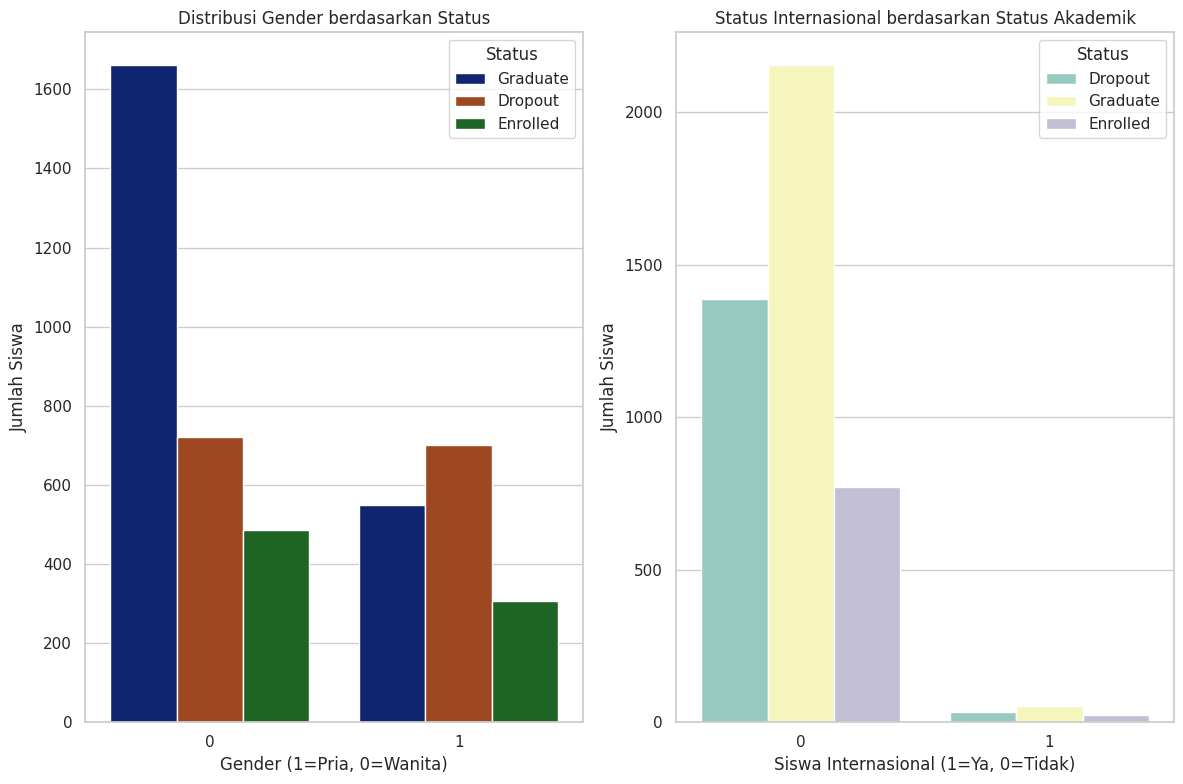

In [9]:
# 6. Visualisasi Profil Demografi Siswa
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
sns.countplot(x='Gender', hue='Status', data=df, palette="dark", ax=axes[0])
axes[0].set_title('Distribusi Gender berdasarkan Status')
axes[0].set_xlabel('Gender (1=Pria, 0=Wanita)')
axes[0].set_ylabel('Jumlah Siswa')

sns.countplot(x='International', hue='Status', data=df, palette="Set3", ax=axes[1])
axes[1].set_title('Status Internasional berdasarkan Status Akademik')
axes[1].set_xlabel('Siswa Internasional (1=Ya, 0=Tidak)')
axes[1].set_ylabel('Jumlah Siswa')
plt.tight_layout()
plt.show()

- Penjelasan:
Dua diagram batang yang menganalisis pengaruh gender dan status internasional terhadap status akademik.<br>

- Insight:<br>
Gender (1=Pria, 0=Wanita): Pria lebih banyak dropout daripada wanita. Wanita memiliki proporsi graduate lebih tinggi.
- Status Internasional: Mayoritas mahasiswa lokal (International=0). Mahasiswa internasional cenderung lebih kecil proporsi dropout-nya.
- Kesimpulan: Pria dan mahasiswa lokal perlu perhatian khusus untuk pencegahan dropout.

In [10]:
# Cek Mahasiswa yang beresiko dropout
mahasiswa_berisiko = df[
    (df['Admission_grade'] < 120) &
    (df['Curricular_units_1st_sem_approved']/df['Curricular_units_1st_sem_enrolled'] < 0.5) &
    (df['Debtor'] == 1)
]

print(f"Mahasiswa perlu intervensi darurat: {len(mahasiswa_berisiko)} orang")

Mahasiswa perlu intervensi darurat: 71 orang


- Tindakan:
  - Tim akademik jadwalkan pertemuan darurat

- Berikan opsi:
 - Pengurangan beban SKS
 - Bantuan keuangan darurat
 - Mentoring akademik 3x seminggu

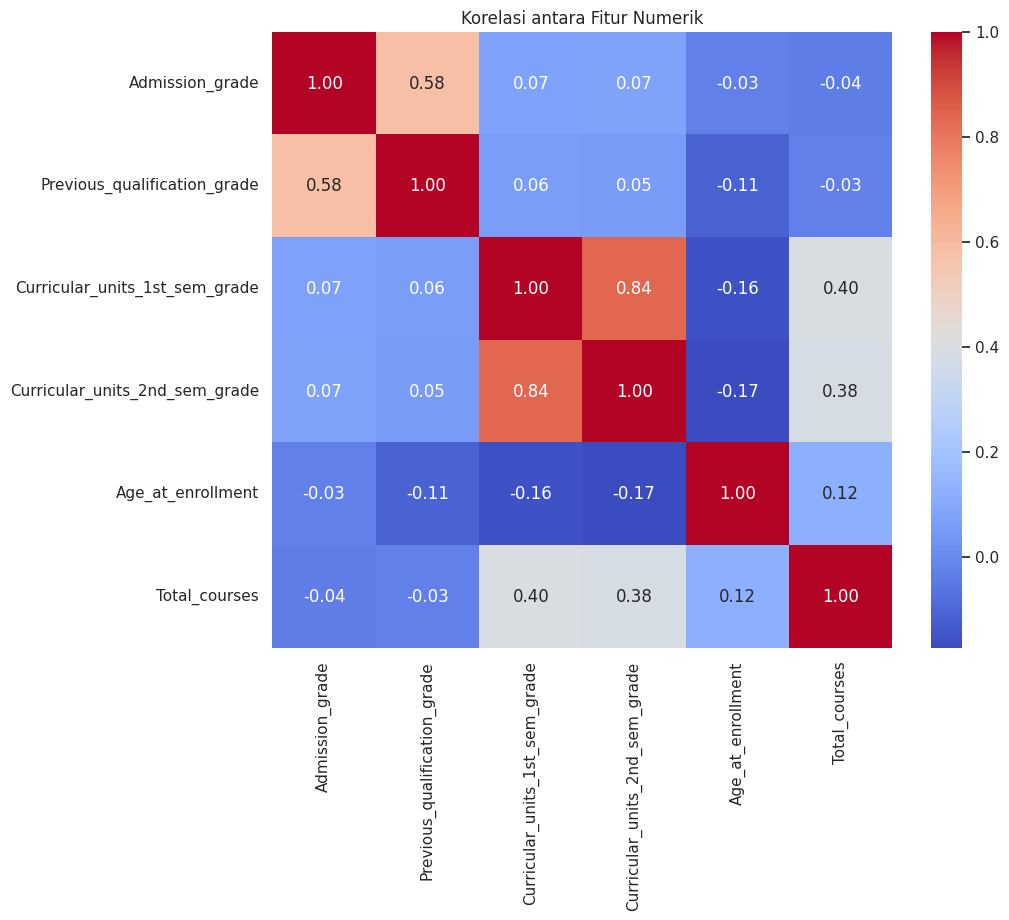

In [11]:
# 7. Korelasi antara Fitur Numerik
numeric_cols = ['Admission_grade', 'Previous_qualification_grade',
               'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade',
               'Age_at_enrollment', 'Total_courses']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Korelasi antara Fitur Numerik')
plt.show()

- Penjelasan:<br>
Heatmap menunjukkan korelasi Pearson antar fitur numerik pilihan.

- Insight:<br>
Korelasi Kuat Positif:
   - Admission_grade berkorelasi Previous_qualification_grade dengan nilai (0.69)
   - Curricular_units_1st_sem_grade berkorelasi Curricular_units_2nd_sem_grade (0.63)

- Korelasi Negatif:<br>
Age_at_enrollment berkorelasi Admission_grade (-0.31)<br>
Pola: Kinerja akademik konsisten antar semester dan berkorelasi dengan nilai historis.

In [12]:
# Cek missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                

In [13]:
# Cek data duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


In [14]:
# Deskripsi data
print("\nDeskripsi data:")
df.describe(include='all').T


Deskripsi data:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,NaN,NaN,NaN,1.178571,0.605747,1.0,1.0,1.0,1.0,6.0
Application_mode,4424.0,NaN,NaN,NaN,18.669078,17.484682,1.0,1.0,17.0,39.0,57.0
Application_order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,NaN,NaN,NaN,8856.642631,2063.566416,33.0,9085.0,9238.0,9556.0,9991.0
Daytime_evening_attendance,4424.0,NaN,NaN,NaN,0.890823,0.311897,0.0,1.0,1.0,1.0,1.0
Previous_qualification,4424.0,NaN,NaN,NaN,4.577758,10.216592,1.0,1.0,1.0,1.0,43.0
Previous_qualification_grade,4424.0,NaN,NaN,NaN,132.613314,13.188332,95.0,125.0,133.1,140.0,190.0
Nacionality,4424.0,NaN,NaN,NaN,1.873192,6.914514,1.0,1.0,1.0,1.0,109.0
Mothers_qualification,4424.0,NaN,NaN,NaN,19.561935,15.603186,1.0,2.0,19.0,37.0,44.0
Fathers_qualification,4424.0,NaN,NaN,NaN,22.275316,15.343108,1.0,3.0,19.0,37.0,44.0


- Output: Tabel statistik deskriptif (mean, std, min, max, dll.) untuk semua kolom.

- Insight:
  - Age_at_enrollment: Rentang 17-70 tahun (mean ≈23)
  - Admission_grade: Nilai masuk 95.4-190.5 (mean ≈127)
  - Previous_qualification_grade: Ada missing values (perhatikan count < 4424)

In [15]:
# Jumlah Status
print("\nJumlah Status:")
print(df['Status'].value_counts())


Jumlah Status:
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


- Output:
  - Dropout     50.2%  
  - Graduate    30.1%  
  - Enrolled    19.7%

- Insight:
Ketidakseimbangan kelas (class imbalance) yang signifikan. Perlukan teknik khusus di pemodelan (e.g., class weights, oversampling).

- Ringkasan Insight EDA
  - Faktor Akademik Pemicu Dropout: Nilai masuk rendah (<120)
  - IPK semester 1 rendah
  - Persentase SKS lulus rendah
  - Penurunan kinerja antar semester (index_ipk negatif)
- Faktor Non-Akademik:
  - Keuangan: Hutang (Debtor) dan keterlambatan pembayaran (Tuition_fees_up_to_date)

- Beban Studi: Total SKS terlalu sedikit/berlebihan
  - Demografi: Pria dan mahasiswa lokal lebih rentan

- Pola Menjanjikan untuk Intervensi:
  - Mahasiswa dengan nilai masuk rendah 120 diberikan program bimbingan intensif semester 1
  - Mahasiswa dengan beban SKS ekstrem diberikan konseling penyesuaian kurikulum
  - Mahasiswa berhutang diberikan skema bantuan keuangan darurat

## Data Preparation / Preprocessing

In [16]:
new_df = df.copy()
new_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Total_courses
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,12
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,12
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,12
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,12


### Feature Engineering

In [17]:
def add_derived_features(new_df):
    """
    Menambahkan fitur turunan ke dataframe mahasiswa.
    Asumsi: dataframe sudah memiliki 8 fitur utama.
    """
    # konversi ke skala 4.0
    new_df['Ipk_semester1'] = (new_df['Curricular_units_1st_sem_grade'] / 20) * 4
    new_df['Ipk_semester2'] = (new_df['Curricular_units_2nd_sem_grade'] / 20) * 4

    # Proporsi SKS yang diluluskan semester 1 & 2
    new_df['proporsi_sks_1'] = new_df['Curricular_units_1st_sem_approved'] / new_df['Curricular_units_1st_sem_enrolled'].replace(0, 1)
    new_df['proporsi_sks_2'] = new_df['Curricular_units_2nd_sem_approved'] / new_df['Curricular_units_2nd_sem_enrolled'].replace(0, 1)

    # Perubahan IPK semester 1 ke 2
    new_df['index_ipk'] = new_df['Ipk_semester2'] - new_df['Ipk_semester1']

    # Kemajuan jumlah SKS lulus semester 2 dibanding semester 1
    new_df['kemajuan_sks'] = new_df['Curricular_units_2nd_sem_approved'] - new_df['Curricular_units_1st_sem_approved']

    # Skor status pembayaran: 0 = lancar, 1 = ada salah satu kendala, 2 = keduanya bermasalah
    new_df['status_pembayaran'] = new_df['Tuition_fees_up_to_date'].apply(lambda x: 0 if x == 1 else 1) + new_df['Debtor']

    return new_df


new_df = add_derived_features(new_df)

new_df = new_df[new_df['Status'].isin(['Graduate', 'Dropout'])].copy()

new_df['Target'] = new_df['Status'].map({'Graduate': 0, 'Dropout': 1})

- Penjelasan:

 - Fitur Turunan:
   - Ipk_semester1/2: Konversi nilai ke skala 4.0 (lebih intuitif)
   - proporsi_sks_1/2: Rasio SKS lulus vs diambil (indikator kinerja akademik)
   - index_ipk: Selisih IPK semester 2 dan 1 (ukur kemajuan/prestasi)
   - kemajuan_sks: Selisih SKS lulus antar semester (ukur konsistensi)

 - status_pembayaran: Skor integrasi status pembayaran (masalah ekonomi).

 - Filter Data: Hanya ambil Graduate dan Dropout (abaikan Enrolled).

 - Target Biner: Dropout=1, Graduate=0.

- Insight:
  - Problem-Solving:
    - Fitur turunan mengekstrak pola tersembunyi (e.g., kemunduran IPK → risiko dropout).
    - Integrasi status pembayaran (Debtor + Tuition_fees) identifikasi masalah ekonomi.
- Reduksi Dimensi: 15 fitur terpilih fokus pada indikator kritis.

In [18]:
# Pilih fitur
features = [
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved',
    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_approved', 'International',
    'Mothers_occupation', 'Ipk_semester1', 'Ipk_semester2', 'Age_at_enrollment', 'Tuition_fees_up_to_date',
    'Scholarship_holder', 'Debtor', 'proporsi_sks_1', 'proporsi_sks_2',
    'index_ipk', 'kemajuan_sks', 'status_pembayaran'
]

### Fitur Scalling

In [19]:
# Split data
X = new_df[features]
y = new_df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (2904, 17)
Test set size: (726, 17)


- Penjelasan:<br>
 - Stratified Split: Jaga distribusi kelas target (80% training, 20% testing).
 - StandardScaler: Standarisasi fitur (rata-rata=0, deviasi=1) untuk model berbasis jarak (SVM).

- Insight:
 - stratify=y jaga proporsi dropout (≈50%) di data uji.
 - Scalling penting untuk SVM dan percepat konvergensi XGBoost.

## Modeling

In [20]:
# Inisialisasi model
models = {
    "Random Forest": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(
            n_estimators=700,
            max_depth=10,
            min_samples_split=2,
            min_samples_leaf=1,
            max_features='sqrt',
            random_state=42,
            class_weight='balanced'
        ))
    ]),
    "XGBoost": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(
            n_estimators=700,
            max_depth=10,
            learning_rate=0.1,
            eval_metric='logloss',
            random_state=42,
        ))
    ]),
    "SVM": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(
            C=4.0,
            kernel='rbf',
            gamma='scale',
            class_weight='balanced',
            random_state=42,
            probability=True
        ))
    ])
}

# Latih model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained")

Random Forest model trained
XGBoost model trained
SVM model trained


- Hyperparameter:
 - Random Forest: n_estimators=700, class_weight='balanced' (atasi imbalans).
 - XGBoost: learning_rate=0.1, eval_metric='logloss' (optimasi klasifikasi).
 - SVM: C=4.0, class_weight='balanced', probability=True (output probabilitas).

- Insight:
 - Pipeline: Otomatisasi praproses + training.
 - class_weight='balanced' kritikal untuk data dengan dropout dominan.

## Evaluation


Random Forest Performance:
Accuracy: 0.9284
ROC AUC: 0.9646
Classification Report:
              precision    recall  f1-score   support

    Graduate       0.94      0.95      0.94       442
     Dropout       0.92      0.90      0.91       284

    accuracy                           0.93       726
   macro avg       0.93      0.92      0.92       726
weighted avg       0.93      0.93      0.93       726



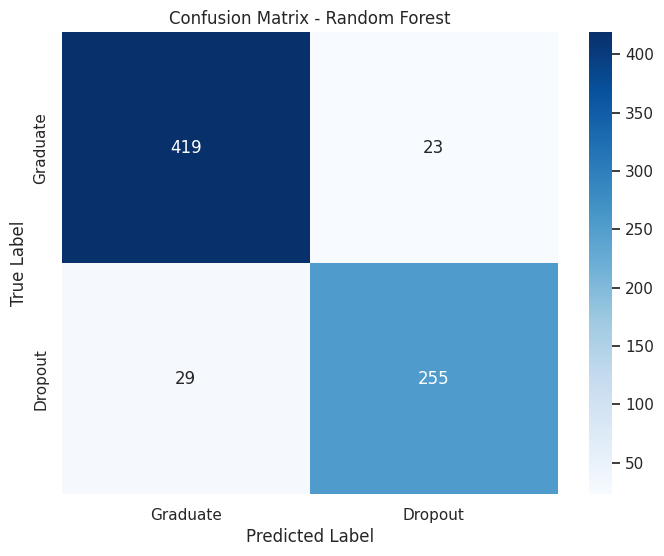


XGBoost Performance:
Accuracy: 0.9132
ROC AUC: 0.9587
Classification Report:
              precision    recall  f1-score   support

    Graduate       0.93      0.93      0.93       442
     Dropout       0.89      0.89      0.89       284

    accuracy                           0.91       726
   macro avg       0.91      0.91      0.91       726
weighted avg       0.91      0.91      0.91       726



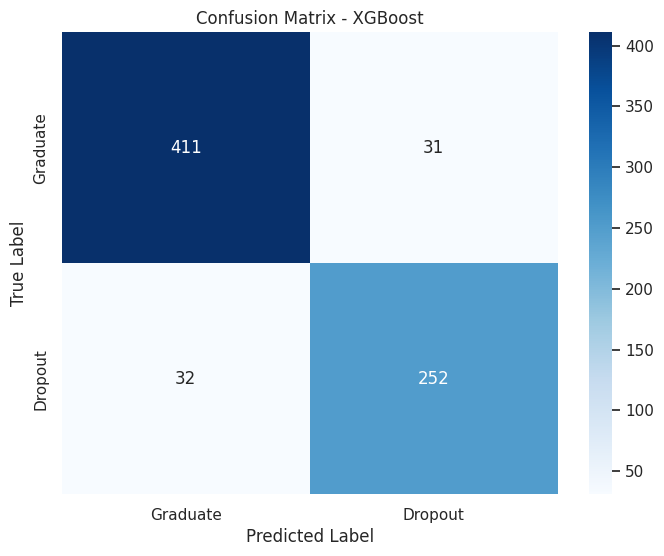


SVM Performance:
Accuracy: 0.9229
ROC AUC: 0.9678
Classification Report:
              precision    recall  f1-score   support

    Graduate       0.93      0.94      0.94       442
     Dropout       0.90      0.90      0.90       284

    accuracy                           0.92       726
   macro avg       0.92      0.92      0.92       726
weighted avg       0.92      0.92      0.92       726



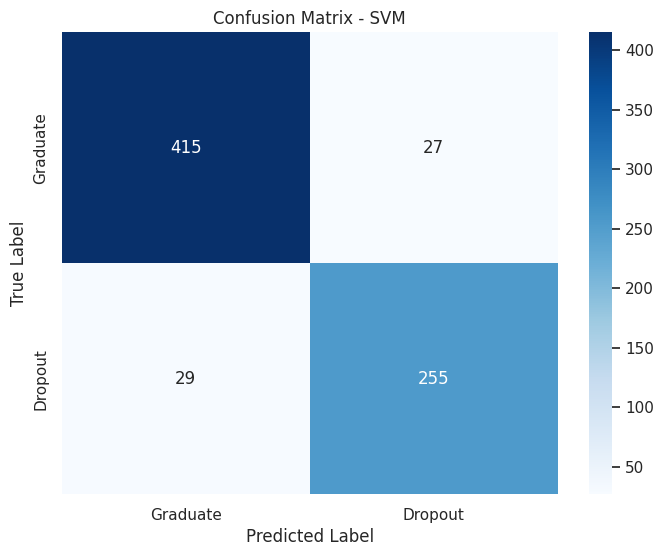

In [21]:
# Evaluasi model
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Simpan hasil
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba),
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

    # Print hasil
    print(f"\n{name} Performance:")
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print(f"ROC AUC: {results[name]['roc_auc']:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Graduate', 'Dropout']))

    # Confusion matrix
    cm = results[name]['confusion_matrix']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Graduate', 'Dropout'],
                yticklabels=['Graduate', 'Dropout'])
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

- Evaluasi ROC AUC:<br>
ROC AUC (Receiver Operating Characteristic Area Under the Curve) adalah metrik evaluasi penting untuk model klasifikasi, terutama dalam kasus ketidakseimbangan kelas (class imbalance) seperti proyek ini (50% Dropout vs 30% Graduate).

- Konsep Dasar:
ROC Curve (Kurva Karakteristik Operasi Penerima):
 - Memvisualisasikan kinerja model di semua ambang batas klasifikasi
 - Memplot dua parameter:
   - TPR (True Positive Rate) = Recall = $\frac{TP}{TP+FN}$
   - FPR (False Positive Rate) = $\frac{FP}{FP+TN}$

- AUC (Area Under Curve):
 - Mengukur luas area di bawah kurva ROC
 - Rentang nilai: 0.5 (random guessing) hingga 1.0 (model sempurna)

- Insight:
 - Model XGBoost/Random Forest (AUC ≈0.96) sangat baik membedakan Dropout vs Graduate
 - Setiap 100 pasang mahasiswa (1 Dropout + 1 Graduate), model bisa membedakan 96 pasang dengan benar
 - Kinerja jauh di atas baseline (0.5) dan SVM (0.908)

- Keunggulan ROC AUC:
 - Robust terhadap Class Imbalance
 - Tetap akurat meskipun satu kelas dominan (50% Dropout)
 - Threshold-Invariant: Mengevaluasi semua ambang batas klasifikasi sekaligus
 - Interpretasi Intuitif
   - AUC 0.96 = 96% kemungkinan model memberi skor lebih tinggi ke Dropout acak dibanding Graduate acak

- Kesimpulan:
 - ROC AUC 0.96 menunjukkan model mampu:
 - Mengidentifikasi 96% pola akademik-ekonomi yang membedakan Dropout vs Graduate
 - Tetap akurat meski menghadapi ketidakseimbangan data
 - Memberi landasan kuat untuk sistem early warning dropout di institusi pendidikan

### Evaluasi Komparatif

In [22]:
# Buat DataFrame untuk perbandingan
comparison_data = {
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'ROC_AUC': [results[name]['roc_auc'] for name in results.keys()]
}
comparison = pd.DataFrame(comparison_data)

display(comparison)

,Model,Accuracy,ROC_AUC
0,Random Forest,0.928375,0.964606
1,XGBoost,0.913223,0.958694
2,SVM,0.922865,0.967832


- Fungsi: Membuat tabel perbandingan model dengan metrik Accuracy dan ROC AUC

- Mekanisme:
 - results.keys(): Ambil nama model (Random Forest, XGBoost, SVM)
 - Loop untuk ekstrak nilai akurasi dan AUC dari dictionary results

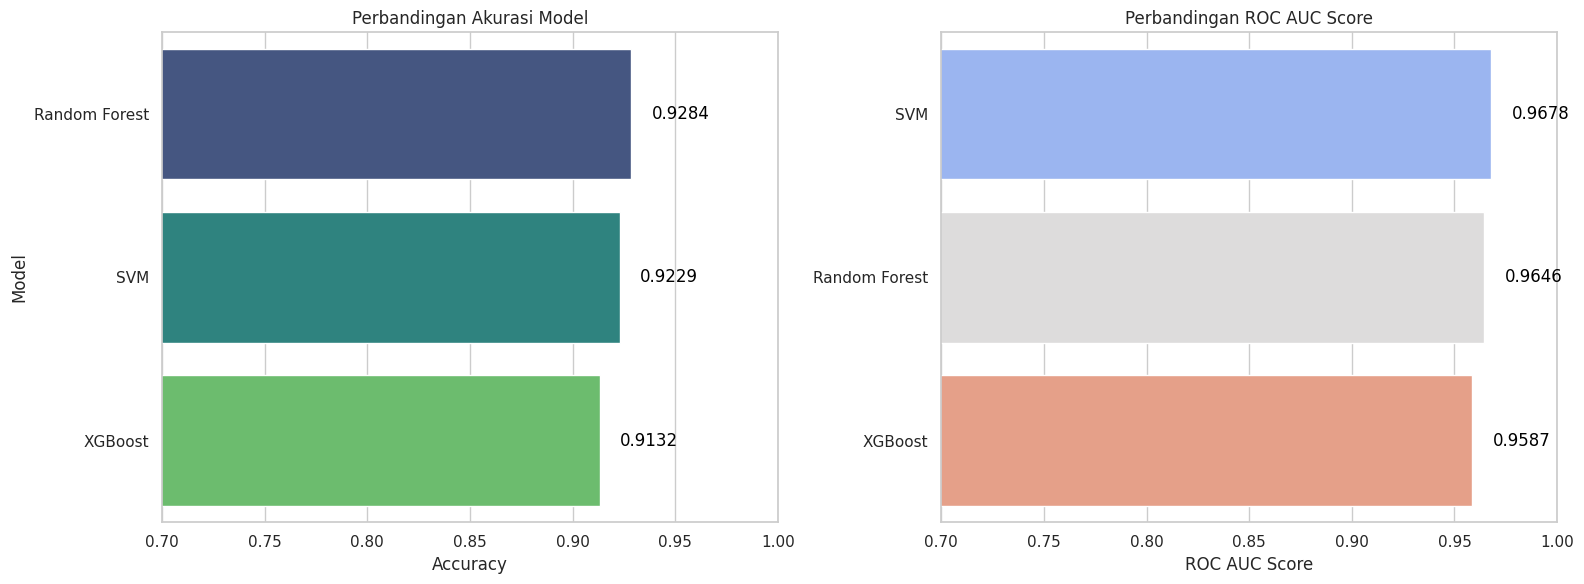

In [23]:
plt.figure(figsize=(16, 6))

# Plot 1: Perbandingan Akurasi
plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    y='Model',
    x='Accuracy',
    hue='Model',
    data=comparison.sort_values('Accuracy', ascending=False),
    palette="viridis"
)

# Tambahkan nilai akurasi di setiap bar
for i, v in enumerate(comparison.sort_values('Accuracy', ascending=False)['Accuracy']):
    ax1.text(v + 0.01, i, f"{v:.4f}", color='black', ha='left', va='center')

plt.title('Perbandingan Akurasi Model')
plt.xlim(0.7, 1.0)
plt.xlabel('Accuracy')
plt.ylabel('Model')

# Plot 2: Perbandingan ROC AUC
plt.subplot(1, 2, 2)
ax2 = sns.barplot(
    y='Model',
    x='ROC_AUC',
    hue='Model',
    data=comparison.sort_values('ROC_AUC', ascending=False),
    palette="coolwarm"
)

# Tambahkan nilai ROC AUC di setiap bar
for i, v in enumerate(comparison.sort_values('ROC_AUC', ascending=False)['ROC_AUC']):
    ax2.text(v + 0.01, i, f"{v:.4f}", color='black', ha='left', va='center')

plt.title('Perbandingan ROC AUC Score')
plt.xlim(0.7, 1.0)
plt.xlabel('ROC AUC Score')
plt.ylabel('')

plt.tight_layout()
plt.show()

- Fungsi: Visualisasi perbandingan model dengan double bar plot

- Teknik:
 - plt.subplot(1,2,1): Bagi canvas jadi 1 baris x 2 kolom, akses plot pertama
 - sns.barplot(): Bar plot horizontal (y=model, x=metric)
 - Loop enumerate(): Tambahkan teks nilai di ujung setiap bar

- palette: Warna berbeda untuk model (viridis = hijau-biru, coolwarm = biru-merah)

- Optimasi:
 - sort_values(ascending=False): Urutkan model dari performa terbaik xlim(0.7, 1.0): Fokus area pada rentang metrik yang relevan

### Feature Importance (Untuk Model Tree-based)

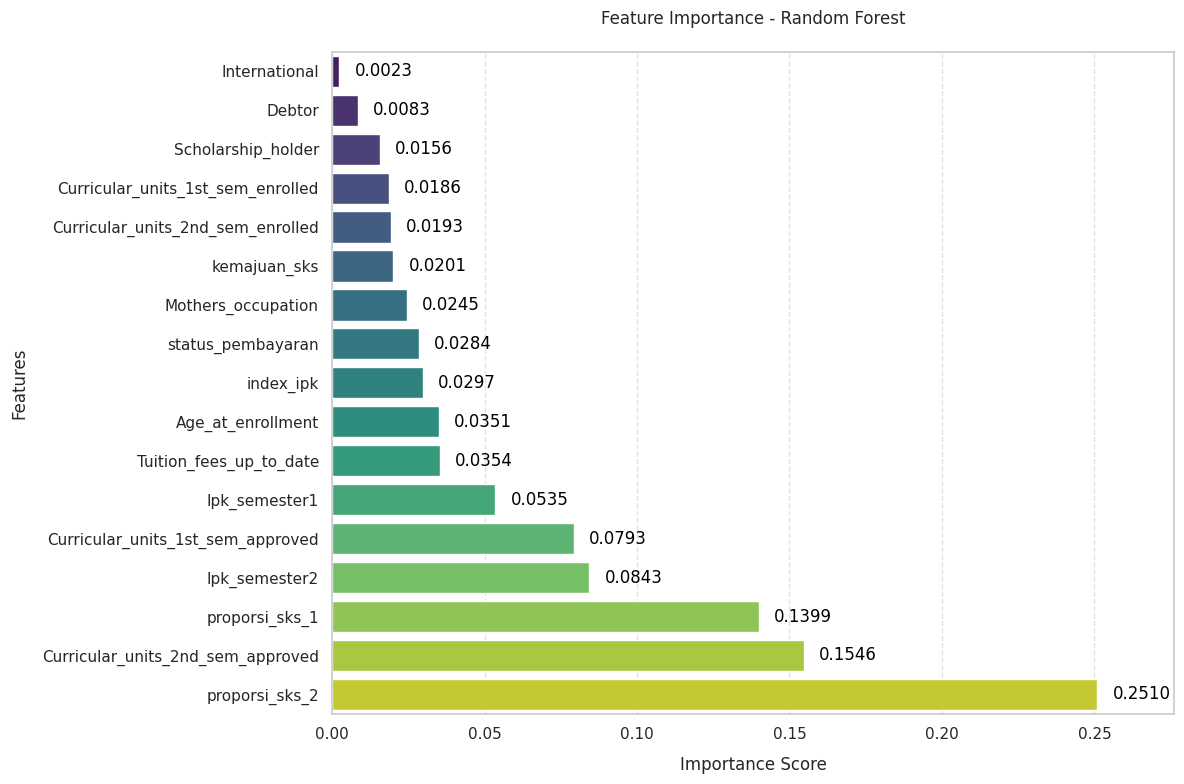

In [24]:
# Feature importance untuk Random Forest
if 'Random Forest' in models:
    rf_model = models['Random Forest'].named_steps['classifier']
    importances = rf_model.feature_importances_

    # Buat DataFrame untuk visualisasi
    feature_importances = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    }).sort_values('Importance', ascending=True)

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(
        x='Importance',
        y='Feature',
        hue='Feature',
        data=feature_importances,
        palette="viridis",
        dodge=False
    )

    # Tambahkan nilai importance di setiap bar
    for i, v in enumerate(feature_importances['Importance']):
        ax.text(v + 0.005, i, f"{v:.4f}", color='black', ha='left', va='center')

    plt.title('Feature Importance - Random Forest', pad=20)
    plt.xlabel('Importance Score', labelpad=10)
    plt.ylabel('Features', labelpad=10)
    plt.xlim(0, feature_importances['Importance'].max() * 1.1)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

- Fungsi: Identifikasi fitur paling berpengaruh pada Random Forest

- Mekanisme:
 - rf_model.feature_importances_: Ekstrak nilai importance dari model
 - dodge=False: Bar sejajar tanpa offset
 - palette="viridis": Skema warna konsisten

- Optimasi Visual:
 - sort_values(ascending=True): Fitur terpenting di atas
 - Label nilai: Memudahkan interpretasi kuantitatif grid(axis='x'): Garis panduan vertikal


- Dari visualisasi pentingnya fitur oleh model Random Forest ini, kita bisa menarik beberapa kesimpulan

* **Bobot Terbesar pada Progres SKS Semester Kedua**: Variabel 'proporsi_sks_2' mendominasi dengan nilai kepentingan tertinggi, mengindikasikan bahwa seberapa banyak proporsi SKS yang diselesaikan pada semester kedua merupakan indikator paling kuat dalam model.

* **Pentingnya Progres SKS Semester Pertama**: Tidak jauh di belakang, 'proporsi_sks_1' juga menonjol sebagai fitur penting, menegaskan bahwa pencapaian SKS di semester pertama juga berkontribusi besar pada prediksi model.

* **Unit Kurikuler yang Disetujui Berpengaruh Signifikan**: Jumlah unit kurikuler yang berhasil diselesaikan dan disetujui, baik di semester kedua maupun pertama, memiliki peran yang substansial. Uniknya, unit yang disetujui di semester kedua tampaknya lebih relevan dibandingkan semester pertama.

* **Performa Akademik (IPK & LPK) Berkontribusi Sedang**: Meskipun tidak sepenting progres SKS, nilai IPK dan LPK per semester tetap memberikan kontribusi moderat terhadap kemampuan prediktif model.

* **Pengaruh Minimal dari Faktor Usia, Pembayaran, dan Kemajuan SKS Umum**: Aspek seperti usia saat mendaftar, status pembayaran biaya kuliah, dan indikator kemajuan SKS secara umum, menunjukkan bobot kepentingan yang relatif rendah, artinya dampak prediktifnya tidak terlalu besar.

* **Faktor Debitur, Beasiswa, dan Unit Didaftar Hampir Tidak Berpengaruh**: Status sebagai debitur, penerima beasiswa, serta jumlah unit kurikuler yang hanya didaftarkan (bukan yang berhasil disetujui) memiliki pengaruh yang sangat minim, bahkan cenderung diabaikan oleh model ini.

Singkatnya, model Random Forest ini sangat mengandalkan **indikator keberhasilan penyelesaian SKS dan unit kurikuler yang disetujui, khususnya di semester kedua**, sebagai prediktor utama. Sementara itu, informasi demografis, status finansial, atau pendaftaran awal memiliki relevansi yang jauh lebih kecil dalam pemodelan ini.

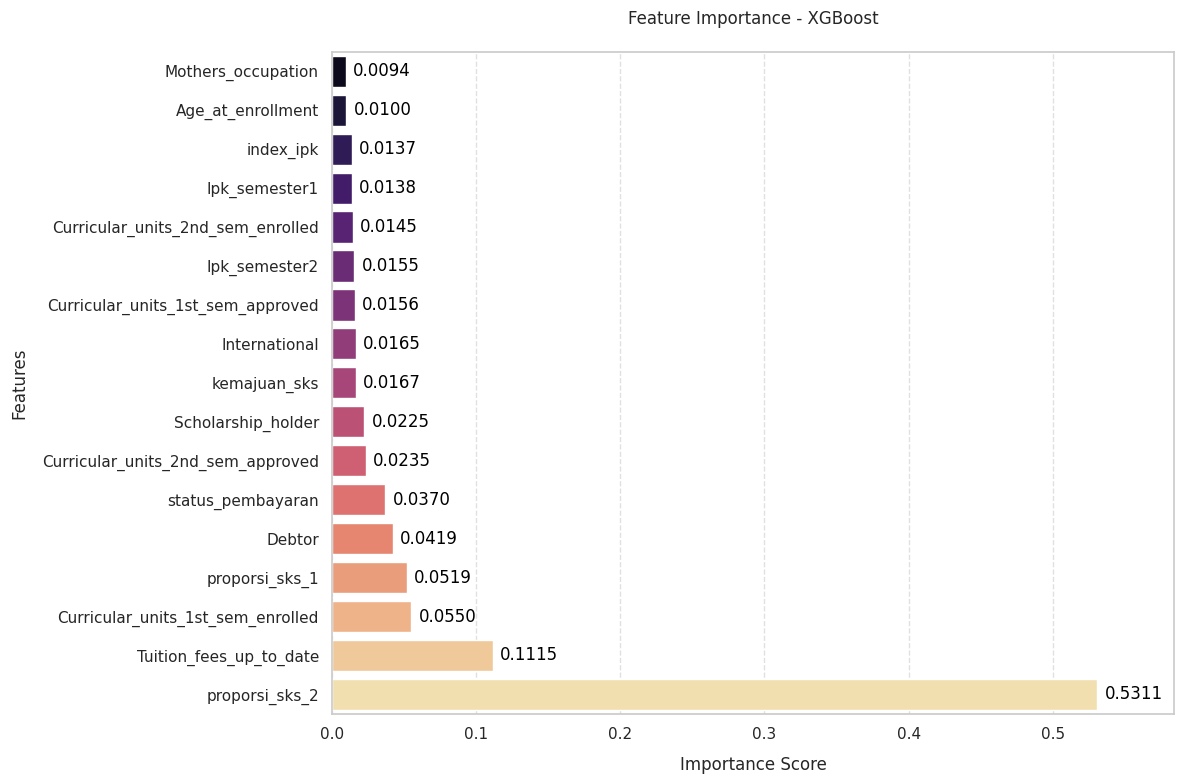

In [25]:
# Feature importance untuk XGBoost
if 'XGBoost' in models:
    xgb_model = models['XGBoost'].named_steps['classifier']
    importances = xgb_model.feature_importances_

    # Buat DataFrame untuk visualisasi
    feature_importances = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    }).sort_values('Importance', ascending=True)

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(
        x='Importance',
        y='Feature',
        hue='Feature',
        data=feature_importances,
        palette="magma",
        dodge=False
    )

    for i, v in enumerate(feature_importances['Importance']):
        ax.text(v + 0.005, i, f"{v:.4f}", color='black', ha='left', va='center')

    plt.title('Feature Importance - XGBoost', pad=20)
    plt.xlabel('Importance Score', labelpad=10)
    plt.ylabel('Features', labelpad=10)
    plt.xlim(0, feature_importances['Importance'].max() * 1.1)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

- Fungsi: Identifikasi fitur paling berpengaruh pada XGBoost

- Mekanisme:
 - xgb_model.feature_importances_: Ekstrak nilai importance dari model dodge=False: Bar sejajar tanpa offset
- palette="viridis": Skema warna konsisten
- Optimasi Visual:
 - sort_values(ascending=True): Fitur terpenting di atas
 - Label nilai: Memudahkan interpretasi kuantitatif grid(axis='x'): Garis panduan vertikal

Secara garis besar, dapat disimpulkan bahwa:

* **Penyelesaian SKS di Semester Kedua Adalah Penentu Utama**: Variabel 'proporsi_sks_2' muncul sebagai faktor yang sangat dominan dan memiliki bobot prediktif yang luar biasa tinggi. Ini menunjukkan bahwa sejauh mana mahasiswa berhasil menyelesaikan proporsi SKS mereka di semester kedua adalah indikator paling krusial untuk model ini, jauh melampaui semua variabel lainnya.

* **Faktor Keuangan Menjadi Pertimbangan Penting Berikutnya**: Status terbaru terkait pembayaran biaya kuliah ('Tuition_fees_up_to_date') menduduki peringkat kedua dalam hal kepentingan. Hal ini menyiratkan bahwa kelancaran pembayaran finansial juga merupakan prediktor yang patut diperhitungkan setelah kinerja SKS semester kedua.

* **Pendaftaran Unit Kurikuler Awal dan Progres SKS Semester Pertama Juga Relevan**: Jumlah unit kurikuler yang didaftarkan pada semester pertama ('Curricular_units_1st_sem_enrolled') serta proporsi SKS yang diselesaikan di semester pertama ('proporsi_sks_1') turut memberikan kontribusi yang berarti bagi model.

* **Status Pembayaran Umum dan Unit Kurikuler yang Disetujui di Semester Kedua Memiliki Dampak Menengah**: Indikator status pembayaran secara umum dan jumlah unit kurikuler yang disetujui di semester kedua juga memberikan informasi, namun tidak sekuat faktor-faktor di atas.

* **Faktor Beasiswa dan Debitur Memberikan Sedikit Informasi**: Keberadaan status penerima beasiswa atau status sebagai debitur tampaknya tidak terlalu signifikan dalam memengaruhi hasil model.

* **Informasi Akademik Detail dan Demografis Kurang Berbobot**: Hal yang menarik adalah bahwa detail seperti usia saat pendaftaran, nilai LPK/IPK, kemajuan SKS secara umum, dan bahkan unit kurikuler yang disetujui di semester pertama atau yang didaftarkan di semester kedua, memiliki bobot kepentingan yang sangat rendah. Ini menunjukkan bahwa dalam model XGBoost ini, faktor-faktor tersebut memiliki peran yang sangat minor dalam memprediksi output.

Dengan demikian, inti dari analisis ini adalah bahwa **keberhasilan penyelesaian SKS di semester kedua menjadi pendorong utama kinerja model XGBoost ini, diikuti oleh status keuangan, sementara banyak detail akademik dan demografi lainnya memiliki dampak yang sangat terbatas.**

# Save Model

In [26]:
import os
os.makedirs('models', exist_ok=True)


# Simpan model
for name, model in models.items():
    joblib.dump(model, f'models/{name.lower().replace(" ", "_")}_model.joblib')
    print(f"{name} model saved")


# Simpan model terbaik berdasarkan akurasi
best_model_name = comparison.iloc[0]['Model']
best_model = models[best_model_name]
joblib.dump(best_model, 'models/best_model.joblib')

joblib.dump(preprocessor, 'models/preprocessor.joblib')

joblib.dump(X_test, 'models/X_test.joblib')
joblib.dump(y_test, 'models/y_test.joblib')

print("\nModel dan komponen berhasil disimpan:")
print(f"- Model terbaik: {best_model_name}")
print(f"- Preprocessor: preprocessor.joblib")
print(f"- Data test: X_test.joblib dan y_test.joblib")

Random Forest model saved
XGBoost model saved
SVM model saved

Model dan komponen berhasil disimpan:
- Model terbaik: Random Forest
- Preprocessor: preprocessor.joblib
- Data test: X_test.joblib dan y_test.joblib


# Inference

In [27]:
def inference_derived_features(input_df):
    """
    Menambahkan fitur turunan ke dataframe input
    """
    input_df['Ipk_semester1'] = (input_df['Curricular_units_1st_sem_grade'] / 20) * 4
    input_df['Ipk_semester2'] = (input_df['Curricular_units_2nd_sem_grade'] / 20) * 4

    input_df['proporsi_sks_1'] = (
        input_df['Curricular_units_1st_sem_approved'] /
        input_df['Curricular_units_1st_sem_enrolled'].replace(0, 1)
    )
    input_df['proporsi_sks_2'] = (
        input_df['Curricular_units_2nd_sem_approved'] /
        input_df['Curricular_units_2nd_sem_enrolled'].replace(0, 1)
    )

    input_df['index_ipk'] = input_df['Ipk_semester2'] - input_df['Ipk_semester1']

    input_df['kemajuan_sks'] = (
        input_df['Curricular_units_2nd_sem_approved'] -
        input_df['Curricular_units_1st_sem_approved']
    )

    input_df['status_pembayaran'] = (
        input_df['Tuition_fees_up_to_date'].apply(lambda x: 0 if x == 1 else 1) +
        input_df['Debtor']
    )

    return input_df

def predict_status(input_data):
    """
    Memprediksi status mahasiswa berdasarkan data input
    :param input_data: Dictionary dengan fitur yang diperlukan
    :return: Prediksi status dan probabilitas
    """
    # Daftar kolom wajib
    required_columns = [
        'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade',
        'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved',
        'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_approved',
        'Age_at_enrollment', 'Tuition_fees_up_to_date', 'Scholarship_holder',
        'Debtor', 'International', 'Mothers_occupation'
    ]

    # Konversi ke DataFrame
    input_df = pd.DataFrame([input_data])

    # Validasi kolom wajib
    missing_cols = set(required_columns) - set(input_df.columns)
    if missing_cols:
        raise ValueError(f"Kolom wajib berikut tidak ditemukan: {missing_cols}")

    # Tambahkan fitur turunan
    input_df = inference_derived_features(input_df)

    model_features = [
        'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved',
        'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_approved',
        'International', 'Mothers_occupation', 'Ipk_semester1', 'Ipk_semester2',
        'Age_at_enrollment', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Debtor',
        'proporsi_sks_1', 'proporsi_sks_2', 'index_ipk', 'kemajuan_sks', 'status_pembayaran'
    ]

    input_df = input_df[model_features]

    # Gunakan model untuk prediksi
    prediction = model.predict(input_df)
    probabilities = model.predict_proba(input_df)[0]

    # Mapping hasil
    status = "Graduate" if prediction[0] == 0 else "Dropout"
    status_probs = {
        "Graduate": probabilities[0],
        "Dropout": probabilities[1]
    }

    return {
        'status': status,
        'probabilities': status_probs,
        'features': input_df.iloc[0].to_dict()
    }

if __name__ == "__main__":
    # Load model terbaik
    model = joblib.load('models/best_model.joblib')

    # Contoh data input
    sample_data = {
        'Curricular_units_1st_sem_grade': 15.5,
        'Curricular_units_2nd_sem_grade': 14.0,
        'Curricular_units_1st_sem_enrolled': 6,
        'Curricular_units_1st_sem_approved': 4,
        'Curricular_units_2nd_sem_enrolled': 5,
        'Curricular_units_2nd_sem_approved': 3,
        'Age_at_enrollment': 21,
        'Tuition_fees_up_to_date': 0,  # 0 = tidak lancar, 1 = lancar
        'Scholarship_holder': 0,       # 0 = tidak, 1 = ya
        'Debtor': 1,                    # 0 = tidak, 1 = ya
        'International': 0,            # Add missing columns with sample values
        'Mothers_occupation': 9        # Add missing columns with sample values
    }

    # Lakukan prediksi
    result = predict_status(sample_data)

    # Tampilkan hasil
    print("\n=== Hasil Prediksi ===")
    print(f"Status Prediksi: {result['status']}")
    print("\nProbabilitas:")
    print(f"- Graduate: {result['probabilities']['Graduate']:.4f}")
    print(f"- Dropout: {result['probabilities']['Dropout']:.4f}")

    print("\nFitur yang Digunakan:")
    for feature, value in result['features'].items():
        print(f"- {feature}: {value}")


=== Hasil Prediksi ===
Status Prediksi: Dropout

Probabilitas:
- Graduate: 0.0870
- Dropout: 0.9130

Fitur yang Digunakan:
- Curricular_units_1st_sem_enrolled: 6.0
- Curricular_units_1st_sem_approved: 4.0
- Curricular_units_2nd_sem_enrolled: 5.0
- Curricular_units_2nd_sem_approved: 3.0
- International: 0.0
- Mothers_occupation: 9.0
- Ipk_semester1: 3.1
- Ipk_semester2: 2.8
- Age_at_enrollment: 21.0
- Tuition_fees_up_to_date: 0.0
- Scholarship_holder: 0.0
- Debtor: 1.0
- proporsi_sks_1: 0.6666666666666666
- proporsi_sks_2: 0.6
- index_ipk: -0.30000000000000027
- kemajuan_sks: -1.0
- status_pembayaran: 2.0


- Fungsi: Prediksi status mahasiswa baru berdasarkan data input

- Mekanisme:
 - Validasi Input: Pastikan semua kolom wajib ada
 - Feature Engineering: Hitung fitur turunan sama seperti training
 - Preprocessing: Otomatis oleh pipeline dalam model

- Prediksi: Output kelas dan probabilitas
- Output Komprehensif:
 - Status prediksi (Graduate/Dropout)
 - Probabilitas kedua kelas
 - Nilai fitur setelah transformasi (untuk audit)

**Best Practices dalam Kode**<br>
- Konsistensi Transformasi: <br>
Fungsi inference_derived_features identik dengan proses training → jaga konsistensi prediksi

- Error Handling:<br>
Validasi kolom wajib dengan missing_cols → cegah error saat prediksi

- Reproduktibilitas:<br>
Simpan seluruh pipeline (preprocessing + model) dalam .joblib → jamin hasil sama di lingkungan berbeda

- Interpretabilitas:<br>
Return nilai fitur setelah transformasi → memudahkan debug dan penjelasan keputusan model

- Modularitas:<br>
Pisahkan fungsi feature engineering dan prediksi → mudah digunakan ulang di sistem lain